# Homework 2: Introduction to Probability and Simulation 
***

**Name**: Matthew Sredojevic
**Colaborator**:Haris Khan

**Section**: (001 or 002)
***

This assignment is due on Moodle by **5pm on Friday February 16th**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/chrisketelsen/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Some problems with code may be autograded.  If we provide a function API please do not change it.  If we do not provide a function API then you're free to structure your code however you like. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

### [20 points] Problem 1 
***

In a box there are 62 fair dice with faces `{1,2,3,4,5,6}`. Call these dice "Standard." In the same box, there are also 2 additional fair dice with faces `{1,1,2,2,3,3}`. Call these dice "Weird."  You grab one die at random from the box.  

Work the following problems by hand (but don't be afraid to simulate to check your result!). 


**Part A**: You roll your die one time.  What is the probability that you roll a 1? 

There are 64 dice with a total of 384 faces to land on. Of the 62 normal dice, there is a 1 in 6 chance to roll a 1. there is a $\frac{62}{64} (\frac{31}{32})$ chane to pick a normal dice with a $\frac{1}{6}$ chance to roll a one

There is also a $\frac{2}{64}(\frac{1}{32})$ to grab a weird dice with a $\frac{2}{6} (\frac{1}{3})$ chance to roll a one

P(roll a one) = P(roll a normal one) + P(roll a weird one)

P(roll a one) = $\frac{62}{64} * \frac{1}{6}$ + $\frac{2}{64} * \frac{2}{6}$

P(roll a one) = $\frac{62}{384} + \frac{4}{384}$ = $\frac{66}{384} or (\frac{33}{192} or \frac{11}{64}) $

#### **Part B**: Suppose you roll a 1.  What is the probability that the die you chose from the box is Weird? 

We dont know the probability that we have a weird die if we roll a one $P(W \mid 1)$ = ?

But we do know the probability of rolling a 1 given we have a weird die $P(1 \mid W)$

so using Bayes, $P(W \mid 1)$ = $P(1 \mid W) * P(W) \over P(1)$

which ends up being $P(W \mid 1)$ = $\frac{1}{3} * \frac{2}{64} \over \frac{11}{64}$ = $ \frac{2}{33}$

**Part C**: Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 4, 5, or 6 you know you picked a Standard die. But, if you roll $n$ times in a row and get only 1, 2, or 3,  you would have a stronger belief that you in fact grabbed one of the Weird dice. What is the smallest value of $n$ successive rolls of 1, 2, or 3 that would make you believe that there's a better-than-90% chance that the die you grabbed is Weird?  

We're looking for the probability of the die being weird given that we roll a 1, 2, or 3 $P(W \mid 1,2,3) = ?$
so we use bayse

$$P(W \mid 1,2,3) = \frac{P(1,2,3 \mid W) * P(W)}{P(1,2,3 \mid W) * P(W) + P(W_{not}) * P(W_{not}))}$$

the probability of rolling a 1,2, or 3 is slightly above half $P(1,2,3)$ given that the die is weird = 1

$$P(W \mid 1,2,3) = \frac{\frac{2}{64}}{\frac{2}{64} + \frac{1}{2}^{n} * \frac{62}{64}}$$

$$P(W \mid 1,2,3) = \frac{\frac{2}{64}}{\frac{2}{64} + \frac{62}{64 * 2^{n}}}$$

and we want a chance above 90%, so $P(W \mid 1,2,3) = .9$

$$ .9 = \frac{\frac{2}{64}}{\frac{2}{64} + \frac{62}{64 * 2^{n}}}$$

$$ .9 = \frac{.03125}{.03125 + \frac{.96875}{2^{n}}}$$

$$ .03125 + \frac{.96875}{2^{n}} = \frac{.03125}{.9}$$ 

$$ .03125 + \frac{.96875}{2^{n}} = .0347222$$

$$ \frac{.96875}{2^{n}} = .00347222$$

$$ \frac{.96875}{.00347222} = 2^{n}$$

$$ 284.184 = 2^{n}$$

$$Log_{2}284.184 = n => 8.15 => 9$$

So we need **9** rolls to determine with 90% accuracy that we have a weird die

### [20 points] Problem 2  
***

In soccer tournaments, [penalty shootouts](https://en.wikipedia.org/wiki/Penalty_shoot-out_(association_football) are used to determine the outcome of the game if the score is tied after regulation play.   In a penalty shootout, each team takes turns attempting 5 shots on the goal from the penalty mark that are defended only by the opposing team's goalkeeper, with the team that makes more successful kicks being declared the winner of the match.  If after 5 shots the score is still tied, the game enters _sudden death_ and the teams continue to take 1 shot each until one team scores and the other does not. 

Suppose that two teams ( Team $A$ and Team $B~$) are still tied at the end of the first round of 5 penalty shots and are entering sudden death.  Each team will now take one shot each in an attempt to win.  Suppose that the result of one shot is independent of the other shots, Team $A$ makes their shot with probability $p$, and Team $B$ makes their shot with probability $q$.  Let $W$ be the event that "Team $A$ wins the game", $E$ be the event that "the game ends after the first round of sudden death penalty shots", and $T$ be the event that "the game is still tied after the first round of sudden death penalty shots". 

**Part A**: The shootout continues until Team $A$ or Team $B$ wins.  What is the sample space $\Omega$ for this experiment?  Represent the outcomes of individual shots by $G$ for a goal and $M$ for a miss and assume that Team $A$ shoots before Team $B$.

$\Omega$ = {G,G}{G,M}{M,G}{M,M}

**Part B**: Determine $P(W \mid E)$ in terms of $p$ and $q$.

$P(W \mid E)$ = ... well $P(W) = p$ so...
$$P(W \mid E) = \frac{P(E \mid W) * P(W)}{P(E \mid W) * P(W) + P(E \mid W^c) P(W^c)}$$

$$P(W \mid E) = \frac{p(1-q)}{p(1-q) + q(1-p)}$$

$$ = \frac{p(1-p)}{p(1-q) + q(1-p)}$$

$$ = \frac{p(1-p)}{p-pq + q-qp} = \frac{p(1-p)}{p+q-2pq}$$

**Part C**: Explain why events $W$ and $T$ are independent. 

$W$ is just the fact that Team A has won. It does not matter what round of sudden death you are in, so long as team A scores and team B does not. $T$ states that the game is still tied after the first round of sudden death. Team A could win in the first round, and this would not satisfy $T$; and the inverse, Team A and B could both score (or miss) and $T$ would be true while $W$ is false

**Part D**: Use the Law of Total Probability to show that $P(W) = p(1-q) + (2pq - p - q +1) ~P(W \mid T)$. 

The probability that Team A wins is the probability that Team A scores plus the probability that Team B scores $$P(W) = P(W \mid E)P(E) + P(W \mid T)P(T)$$

and if Team A has a probability of p of scoring and Team B a probability of q
$$ P(W) = P(W \mid E)P(E) + (pq + (1-p)(1-q))P(W \mid T) $$

then if both teams score or both teams miss (still a tie)
$$ P(W) = p(1-q) + (pq + (1-p)(1-q))P(W \mid T) $$

now lets do some factoring
$$ P(W) = p(1-q) + (pq + 1-q-p+qp)P(W \mid T) $$
$$ P(W) = p(1-q) + (2pq + 1-q-p)P(W \mid T) $$

**Part E**: Use the fact from **Part C** that $P(W \mid T) = P(W)$ to determine $P(W)$ in terms of $p$ and $q$. 

$$P(W \mid T) = \frac{P(T \mid W * P(W)}{P(T \mid W * P(W) + P(E \mid W^c)P(W^c)}$$
will thus become
$$P(W) = p(1-q) + (2pq - p - q +1) P(W)$$

I'm confused

**Part F**: Explain why the answers to **Part B** and **Part E** are the same. 

**Part G**: Explain the significance of the solution technique for $P(W)$ outlined in **Part D** and **Part E**.  Why did we go this route instead of computing $P(W)$ directly?  Can we always use such techniques?  

### [25 points] Problem 3 
***

Jerry and Steve are just your typical North American river otters. They like typical otter things: sushi, the Boulder Reservoir, Kyle's office, Sofie's office, and the Ecology Department.  

After CSCI 3022 lets out for the day, there are a bunch of different locations that Jerry and Steve individually end up at.  Sometimes they go get sushi on the hill ($~H~$) or go for a swim at the Res ($~R~$). Sometimes they go straight to office hours with Kyle ($~K~$) or with Sofie ($~S~$), or they read otter-related literature in the Ecology dept ($~E~$). You can see the locations and paths that they take from Muenzinger ($~M~$) and between other locations on map below.

Now, on a Wednesday after a really bumpy few days, Jerry and Steve leave class at Muenzinger, very very grumpy. They just wander randomly between their usual spots. Their movement is governed by the following rule: when leaving a particular location, they randomly select one of the available paths to travel along with equal probability. This even includes backtracking as an option! They sure are grumpy. 

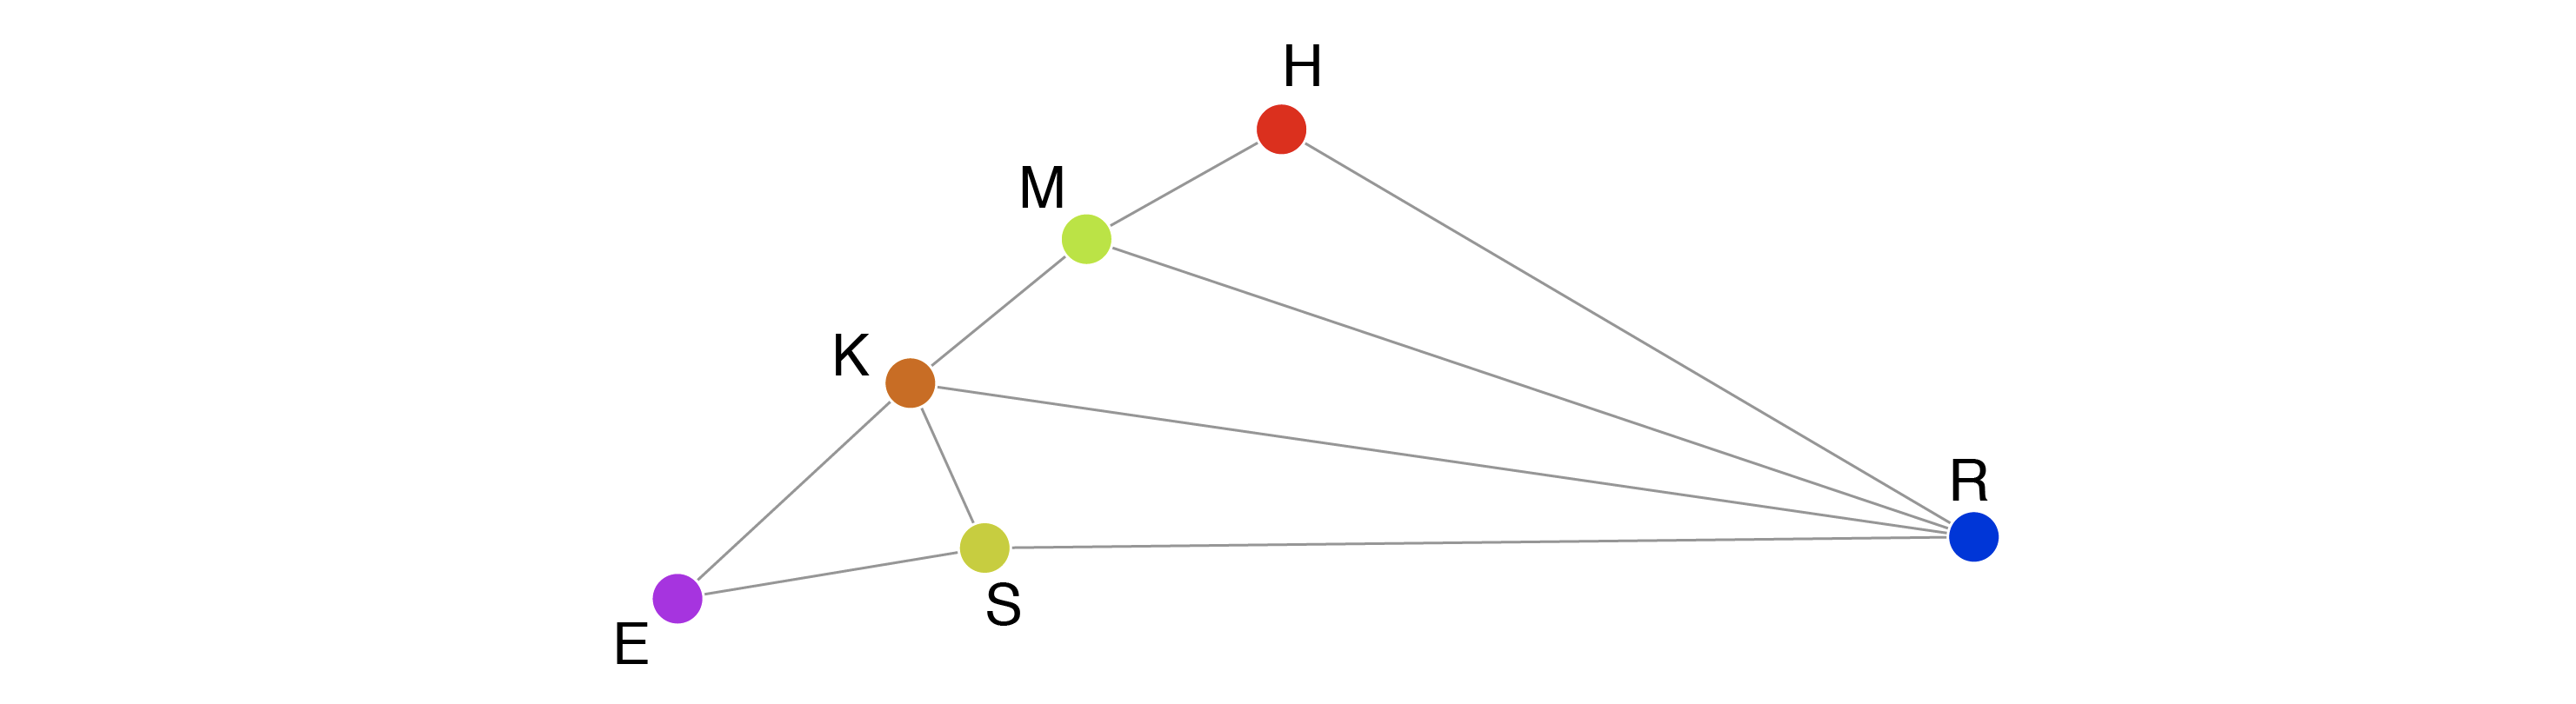

**Part A**: Compute (by hand) the probability that Steve ends up at the the Boulder Reservoir after first visiting one other location after leaving Muenzinger. 

So the max path length is 2?

So theres like... 10 different paths that you can do and only 2 of those 10 paths bring you to the Reservoir

so theres a $\frac{2}{10}$ chance they end up at the reservoir after visiting two locations.BUT there isnt an equal amoutnof choice between location.

there is a 1/3 chance we to go H, M or K first. If we go to H first, theres a 1/2 chance we go to R. If we go to M first, there is NO chance we go to M next. If we go to K first, then there is a 1/4 chance we go to R, so the sum of these probabilities is $P(R \mid H) = \frac{1}{2} * \frac{1}{3}$ + $P(R \mid K) = \frac{1}{4} * \frac{1}{3}$ => $\frac{1}{6} + \frac{1}{12}$ = $\frac{3}{12}$

**1/4**

**Part B**: Compute (by hand) the probability that Jerry ends up at Kyle's office _either_ as his first _or_ second location visited after leaving the Reservoir. (Again, assume that Jerry wanders randomly using the same rules described above.)

the chance that Jerry ends up at kyles office is 1/4 because in the first move there are only 4 options and 1 of those options is kyles office

the chance that Jerry ends up at kyles office depends on where they went first. If they went to H first, there is a 0/4 chance because H does not go to kyles office
if then went to M first, there is a 1/3 chance they end up at kyles office
if they went to k first, there is again a 0 chance they end up at kyles office
if they went to S first, there is a 1/3 change they end up at kyles office

so there is a 2/12 chance that they get there on the second move and a 1/4 chance they get there on the first move. so the sum of that is **5/12** chance they end up at kyles office after 1 or 2 visits

**Part C**: Suppose that Jerry goes to the Boulder Reservoir and Steve goes to the Ecology Dept.  Later that afternoon, they both leave and wander around, randomly, as described above. You should assume that they take the same amount of time to go from location to location.  What is the probability that they run into each other in the same location on the first location visited? What is the probability that they run into each other in the same location on the second location visited? What is the probability that they run into each other in either the first or second location visited?

for meeting at the first location visit, there are 8 total combinations of locations, because Jerry (starting at R) has 4 options and Steve (starting at E) has 2. In two of these instances, steve and Jerry are at the same location, so 1/4 of the time, they will intersect.

So the probability that they intersect each other after the first location visit is $\frac{1}{4}$ or 25%

now lets look at the second intersection.

we are going to check the probability that jerry gets to a specific spot after 2 turns and steve gets to a specific spot after 2 turns (indeptendently). First Steve

possibility of Steve at M = $\frac{1}{8}$

possibility of Steve at H = $0$

possibility of Steve at K = $\frac{1}{6}$

possibility of Steve at S = $\frac{1}{8}$

possibility of Steve at R = $\frac{7}{24}$

possibility of Steve at E = $\frac{7}{24}$

Now Jerry

possibility of Jerry at M = $\frac{3}{16}$

possibility of Jerry at H = Does not matter because steve was 0

possibility of Jerry at K = $\frac{1}{6}$

possibility of Jerry at S = $\frac{1}{16}$

possibility of Jerry at R = $\frac{17}{48}$

possibility of Jerry at E = $\frac{7}{48}$

Now by the power of math, we will multiply their chances at the same locations (jerry as x * steve at x) and get the total of that.

these numbers are ugly so i got
$$ \frac{4}{128} + \frac{1}{36} + \frac{168}{1152}$$

so then after putting this into a calculator, i got $.20486\overline1$

now for both:
so its not just a direct sum. Its the union of the first part and the second part minus the interection of the two parts
so the union of the two is a chance of around **.45** but there are times when they overlap (a count in two turns that they were at the came location at one turn)
so there are only two places they can be at the same place after 1 move: K and S (Kyle and Sophia FTW) 

We did this in part 1, there is a 25% ($\frac{1}{4}$) chance they are at the same spot. Now from there, we need to find the probability they were at the same spot AGAIN

from K, the P for both Steve and Jerry going to the same place is $\frac{1}{4}$

from S, the P for both Steve and Jerry going to the same place is $\frac{1}{3}$

like in the above part, we will multiply the chances at each spot and add them together
(this is a lot easier so I will show it)
$$ \frac{1}{4} * \frac{1}{8} + \frac{1}{3} * \frac{1}{8}$$
$$ \frac{1}{32} + \frac{1}{24}$$
and we get 1/32 + 1/24 = $.07291\overline6$

so that rough .45 - a rough .0729 = **.3771**

**Part D**: Write a simulation to confirm that your by-hand calculations in **Part A**, **Part B**, and **Part C** are correct. Make sure you run your simulations for enough trials that your estimates are reasonably close to your analytic results. In addition to showing your code, you should thoroughly explain in Markdown (not just in code comments) what your code is doing and why it is a reasonable approximation of the probabilities in **Part A**, **Part B**, and **Part C**.  

In [218]:
R = ['h','m','k','s']
E = ['k','s']
H = ['m','r']
M = ['h','k','r']
K = ['e','s','r','m']
S = ['e','k','r']
    
def fixIndex(l):
    if l == "r":
        return R
    if l == "e":
        return E
    if l == "h":
        return H
    if l == "m":
        return M
    if l == "k":
        return K
    if l == "s":
        return S
    
# Boo-hoo, im not using pointers :(
    

def sim3c():
    oneMoveCount = 0
    twoMoveCount = 0
    combo = 0
    firstTry = False
    
    jerry = R
    steve = E
    
    jer1 = np.random.randint(0,len(jerry))
    ste1 = np.random.randint(0,len(steve))
    
    jerry = fixIndex(jerry[jer1])
    steve = fixIndex(steve[ste1])
    
    if jerry == steve:
        firstTry = True
        oneMoveCount +=1
        
    jer2 = np.random.randint(0,len(jerry))
    ste2 = np.random.randint(0,len(steve))
        
    jerry = jerry[jer2]
    steve = steve[ste2]
    
    if jerry == steve:
        twoMoveCount +=1
        if firstTry == True:
            combo +=1
    
    return oneMoveCount, twoMoveCount, oneMoveCount + twoMoveCount - combo

def sim3a():
    steve = M
    ste1 = np.random.randint(0,len(steve))
    
    steve = fixIndex(steve[ste1])
    
    ste2 = np.random.randint(0,len(steve))
    
    steve = steve[ste2]
    
    if steve == "r":
        return 1
    
    return 0

def sim3b():
    jerry = M
    jer1 = np.random.randint(0,len(jerry))
    if jerry[jer1] == 'k':
        return 1
    
    jerry = fixIndex(jerry[jer1])
    jer2 = np.random.randint(0,len(jerry))
    if jerry[jer2] == 'k':
        return 1
    
    return 0

    
    
def simItAll(n):
    threeA = 0
    for i in range (0,n):
        threeA += sim3a()
    print("For question 3a:")
    print(threeA/n)
    print("")
    
    threeB = 0
    for i in range (0,n):
        threeB += sim3b()
    print("For question 3b:")
    print(threeB/n)
    print('')
    
    threeC1 = 0
    threeC2 = 0
    threeC3 = 0
    for i in range (0,n):
        f, s, t = sim3c()
        threeC1 += f
        threeC2 += s
        threeC3 += t
    
    print("For question 3c:")
    print(threeC1/n)
    print(threeC2/n)
    print(threeC3/n)
    
simItAll(50000)

For question 3a:
0.24654

For question 3b:
0.419

For question 3c:
0.24954
0.20122
0.37938


**For part 3A)**
My code in part 3a. I am putting Jerry his starting spot M, then I do a random roll between 1 and the length of the array M(which has all of the places one can go from M) so there is a $\frac{1}{n}$ for directions from M = n and then it sets Jerry equal to the new array that associates with the given letter (rolls an H, go to H, get array of H set to Jerry). Then we roll again and from there, we check if the roll is at r, and if is true, we return 1 and take the sum of those returns over the runs to get the total chance

**For part 3B)**
My code for part 3b does a very similar method to part a. Part A only checked if it worked after the second roll. this however, is checking on both the first and the second roll. So it follows the same chance as above but starts a new spot.


**For part 3C)**
Following a similar method of the above two, there are 3 counters overall. One counter for encountering at the first roll, one counter for counting at the second roll, and a third counter that only adds when counter at second added 1 and counter at first added one. this value acts as the intersection of meeting after first roll and meeting after second roll. it then returns the the first, second values and the the final return is the first + the second - the third, creating the union of the two data sets minus their intersection and then the print out is those three values over the number of attempts made



### [20 points] Problem 4 
***

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of [Monopoly](https://en.wikipedia.org/wiki/Monopoly_(game)).  The game consists of a round board with 40 "squares" numbered from $0$ to $40$, where squares $0$ and $40$ are [coincident](https://en.wikipedia.org/wiki/Coincident) and called **GO**.  A player starts on **GO** with \$200 in their pocket.  On each turn the player rolls a pair of dice and then moves a number of spaces equal to the sum of the dice.  Landing on different squares have different results: 

- Squares 2, 7, 17, 22, 33, and 36 cause you to draw a card.  The cards tell you to collect \$50 or \$100, or pay the bank \$100, \$125, or \$150.  

<p> </p>

- Squares 0, 10, and 20 do not trigger any action 

<p> </p>

- Square 30 is **Go To Jail**, which sends the player directly to **Jail** and ends the turn 

<p> </p>

- If a player starts a turn from **Jail** she rolls two dice: 

    - If the player rolls doubles (i.e. the dice have equal values) the player moves from Square 10 a number of squares equal to the sum of the dice
    
    - If the player rolls anything other than doubles she pays the bank \$10 and remains in **Jail** 
    
<p> </p>

- If the player passes or lands on **GO** she collects \$200. 

<p> </p>

- If the player lands on any other square not mentioned above, she pays the bank an amount equal to the square's number (e.g. if she lands on Square 29 she pays the bank \$29). 

<p> </p>

- If the player rolls doubles, she gains $10\times$ the doubled number, in addition to whatever other actions her roll may have caused. For example, rolling two sixes results in a payment of \$60. This rule does not apply if the player begins the turn from Jail.

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends. 

<br>

**Part A**: Complete the function miniopoly_turn below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.  

In [309]:
def miniopoly_turn(state, cash):
    #IF YOU ARE IN JAIL THIS IS HOW YOU ROLL
    if state == 30:
        jailRoll1 = np.random.randint(1,6)
        jailRoll2 = np.random.randint(1,6)
        if jailRoll1 == jailRoll2:
            state = 10 + jailRoll1 + jailRoll2
        else:
            cash = cash - 10
            if cash <=0:
                return state, 0
            return state, cash
    #IF YOU ARE NOT IN JAIL, THEN THIS IS HOW YOUR ROLL
    else:
        #random number for a roll
        roll1 = np.random.randint(1,6)
        roll2 = np.random.randint(1,6)
        if roll1 == roll2:
            cash = cash + roll1*10

        state += roll1+roll2
    #wrap around the board
    if state >=40:
        state = state - 40
        cash = cash + 200
    #special squares
    if state in [2,7,17,22,33,36]:
        drawACard = np.random.randint(0,5)
        #depending on drawACard, give or take away money
        cards = [50, 100, -100, -125, -150]
        cash = cash + cards[drawACard]
        if cash <= 0:
            return state, 0
        
    #money not taken squares (jail included)
    elif state != 0 or state != 10 or state !=20 or state !=30:
        cash = cash - state
        if cash <=0:
            return state, 0
    
    return state, cash
miniopoly_turn(0,200)

#something here is wrong and after going over it so many times im honestly not sure whats is it thats wrong

(5, 195)

**Part B**: Use your function from **Part A** to Simulate at least 5000 30-turn games of Miniopoly and make a frequency histogram of the player's cash at the end of the game. 

(array([  2.01800000e+03,   9.80000000e+01,   1.31000000e+02,
          2.22000000e+02,   2.66000000e+02,   3.51000000e+02,
          3.38000000e+02,   3.40000000e+02,   2.99000000e+02,
          2.59000000e+02,   2.49000000e+02,   1.58000000e+02,
          1.14000000e+02,   6.80000000e+01,   3.80000000e+01,
          2.70000000e+01,   1.10000000e+01,   9.00000000e+00,
          3.00000000e+00,   1.00000000e+00]),
 array([    0. ,    66.1,   132.2,   198.3,   264.4,   330.5,   396.6,
          462.7,   528.8,   594.9,   661. ,   727.1,   793.2,   859.3,
          925.4,   991.5,  1057.6,  1123.7,  1189.8,  1255.9,  1322. ]),
 <a list of 20 Patch objects>)

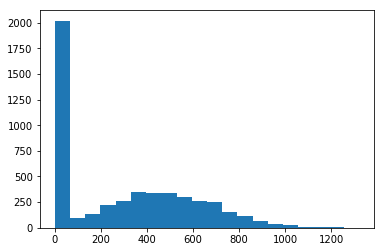

In [240]:
def playTheGame(games):
    cashAtEnd = []
    
    for n in range (0,games):
        cash = 200
        square = 0
        #turns 1-30 ↓
        for i in range (0,29): 
            square, cash = miniopoly_turn(square,cash)
            if cash == 0:
                break
        cashAtEnd.append(cash)               
            
    return cashAtEnd
#i need to fix this up to be more maliable
losses = playTheGame(5000)

plt.hist(losses, bins=20)


**Part C**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns of the game. 

In [234]:
# similar to above, just if return 0, then add 1 to failed games
def tryTheGame(games):
    counter = 0
    for n in range (0,games):
        #turn one ↓
        square, cash = miniopoly_turn(0,200)
        #turns 2-30 ↓
        for i in range (0,29): 
            square, cash = miniopoly_turn(square,cash)
            if cash == 0:
                counter+=1
                break
    
    return counter/games
tryTheGame(5000)

0.3892

**Part D**: Use your code from **Part A** to estimate the probability that a player goes bankrupt in the first 30 turns _given_ that they went to **Jail** at least once.  Is a player more or less likely to go bankrupt if they've been to **Jail**?  

In [223]:
# similar to above, now we only add loss IF their square was equal to 30 (i think thats the jail square)
def tryTheJail(games):
    cashAtEnd = []
    goToJail = []
    for n in range (0,games):
        jailTime = False
        #turn one ↓
        square, cash = miniopoly_turn(0,200)
        #turns 2-30 ↓
        for i in range (0,28): 
            square, cash = miniopoly_turn(square,cash)
            if square == 30:
                jailTime = True
            if cash == 0:
                break
        cashAtEnd.append(cash)
        if jailTime == True:
            goToJail.append(1)
        else:
            goToJail.append(0)
    jailed = 0
    bankrupt = 0
    for i in range (0, len(cashAtEnd)):
        if goToJail[i] == 1:
            jailed +=1
            if cashAtEnd[i] == 0:
                bankrupt +=1
    return bankrupt/jailed
            
tryTheJail(5000)

0.2788956481048198

**Part E**: Use your code from **Part A** to estimate the probability (either directly or using Bayes' Rule) that a player has gone to jail at least once, given that the player went bankrupt in the first 30 turns.

In [229]:
# im honestly not sure what the difference between this and the part above is
#Bayes Rule
def tryTheBank(games):
    cashAtEnd = []
    goToJail = []
    for n in range (0,games):
        jailTime = False
        #turn one ↓
        square, cash = miniopoly_turn(0,200)
        #turns 2-30 ↓
        for i in range (0,28): 
            square, cash = miniopoly_turn(square,cash)
            if square == 30:
                jailTime = True
            if cash == 0:
                break
        cashAtEnd.append(cash)
        if jailTime == True:
            goToJail.append(1)
        else:
            goToJail.append(0)
    jailed = 0
    bankrupt = 0
    for i in range (0, len(cashAtEnd)):
        if cashAtEnd[i] == 0:
            bankrupt +=1
            if goToJail[i] == 1:
                jailed +=1
    return jailed/bankrupt
    
tryTheBank(5000)    

0.3329177057356609

### [15 points] Problem 5 
***

### Board Game Calamity! 

Dan, Kyle, and Sofie have been playing board games for ages. Among the games they play a lot are Miniopoly and a similar game with slightly tweaked rules called **Fakeiopoly!**  Being Data-Nerds, they like to record the details of each game they play for future analysis.  Since the games are similar, they store the results for Miniopoly and Fakeiopoly in the same database.  Unfortunately, their data has been corrupted!  The only data that survived are the states (i.e. square numbers) they were on after each of the first 20 turns as well a the amount of cash they had on hand after each of the first 20 turns. This information is stored in the columns **S1**-**S20** and **C1**-**C20** in the following DataFrame. 

In [259]:
dfLog = pd.read_csv("game_log.csv")
dfLog.loc[499:1000]

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C22,C23,C24,C25,C26,C27,C28,C29,C30,Game
499,4,9,16,20,29,36,6,16,21,28,...,567,557,547,537,527,517,507,497,481,fake
500,8,18,25,30,30,30,30,30,30,14,...,0,0,0,0,0,0,0,0,0,NaN
501,7,15,27,34,3,5,15,21,27,31,...,680,648,848,843,862,846,696,669,519,NaN
502,6,10,16,23,27,33,3,9,14,21,...,523,513,503,503,475,438,635,626,610,NaN
503,6,11,14,19,28,38,3,10,16,28,...,440,414,377,569,551,525,491,690,679,NaN
504,6,13,17,24,31,38,10,16,23,35,...,576,570,559,544,523,495,456,653,642,NaN
505,7,15,23,25,34,1,4,7,14,21,...,558,524,719,719,719,696,796,696,896,NaN
506,9,15,23,29,36,0,6,16,24,31,...,507,498,464,661,649,749,721,731,721,NaN
507,4,11,19,25,30,30,18,22,27,36,...,308,269,463,448,430,436,408,373,673,NaN
508,6,14,20,26,33,37,3,8,17,22,...,391,394,589,577,452,429,403,425,621,NaN


You might notice that there is one extra column in the DataFrame called **Game** which describes whether they were playing Miniopoly (labeled real) or Fakeiopoly (labeled fake).  Unfortunately, the **Game** labels only survived in the first half of the DataFrame.  As you can see, the **Game** labels in the second half of the database were lost. 

In [56]:
dfLog.tail()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C22,C23,C24,C25,C26,C27,C28,C29,C30,Game
995,8,12,16,24,34,0,11,18,22,29,...,556,552,712,702,682,654,704,901,888,NaN
996,7,15,22,24,27,30,34,0,6,8,...,446,432,409,379,279,476,486,536,524,NaN
997,5,11,14,22,25,32,0,5,10,15,...,585,585,585,557,607,707,695,709,690,NaN
998,11,14,25,29,38,9,14,19,24,33,...,505,468,543,557,546,531,508,476,676,NaN
999,5,7,17,24,24,24,24,24,24,24,...,0,0,0,0,0,0,0,0,0,NaN


While they can deal with the loss of information about later turns, doing any kind of meaningful analysis on the data requires knowledge of which game they were playing.  Your job is to see if you can reconstruct the missing **Game** labels in the second half of the DataFrame.  

Sadly, Fakeiopoly was a game of their own invention, and the rules were among the lost data.  But, being budding data scientists, you can probably glean some insights into the non-standard rules by exploring the data with intact labels in the first half of the DataFrame. 

**Part A**: Complete the function predict_game_log below to predict whether each game in the DataFrame is real or fake.  To help you, we've provided a score function that reports the accuracy of your predictions on the rows that have intact labels.  

OK, here are the **rules**: 

- You may **NOT** load any external libraries beyond Pandas, Numpy, and Matplotlib.  Instead of fancy Machine Learning techniques you may have picked up on the streets, you'll have to rely on your probability, heuristics, and exploratory data analysis skills. 
- You may write any additional functions you like, but you should **NOT** change the way that predict_game_log is called or what it returns. 

And some final **guidance**: 

- While we hope you do well, and obtain great accuracies, we're more interested in seeing how you approach the problem.  As part of your solution you should describe in detail how you based your predictions.  A solution with high accuracy and no justification of you approach may receive a low score, while a solution with mediocre accuracy and good justification may receive a high score.  What aspects of the data lead you to believe that your approach might be successful? Supporting evidence might include graphical summaries of the data and extensive description of trial and error. 

In [306]:
first20S = ['S1','S2','S3','S4','S5','S6','S7','S8','S9','S10','S11','S12','S13','S14','S15','S16','S17','S18','S19','S20']

first20C = ['C1','C2','C3','C4','C5','C6','C7','C8','C9','C10','C11','C12','C13','C14','C15','C16','C17','C18','C19','C20']

relColumns = first20S + first20C
relColumns.append('Game')

dfNewLog = pd.DataFrame(dfLog, columns = relColumns)
def predict_game_log():
    '''
    Function to read in the corrupted DataFrame and make predictions
    about which game is associated with each sequence of states 
    and cash values.  You should store your predictions ("real"/"fake")
    in the column "Prediction" in the DataFrame. 
    '''
    
    dfPredict = pd.read_csv("game_log.csv")
    dfPredict.loc[:,"Prediction"] = "real"
    
    
    for i in range(1000):
        rollAvg = []
        mostCommonRoll = 0
        for j in range(19):
            cur = dfPredict.loc[i,first20S[j]]
            nxt = dfPredict.loc[i,first20S[j+1]]
            cash = dfPredict.loc[i,first20C[j]]
            avgRoll = nxt - cur
            rollAvg.append(avgRoll)

            
            if nxt == cur and nxt ==31 and cash !=0:
                dfPredict.loc[i, "Prediction"] = "fake"
                break
        rollSum = 0
        for i in rollAvg:
            rollSum+= i
        mostCommonRoll = rollSum/len(rollAvg)
        if mostCommonRoll <6 or mostCommonRoll >8:
            dfPredict.loc[i, "Prediction"] = "fake"
        

    
    return dfPredict 
predict_game_log()

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,C23,C24,C25,C26,C27,C28,C29,C30,Game,Prediction
0,2.0,6.0,16.0,22.0,32.0,0.0,4.0,13.0,15.0,21.0,...,581.0,777.0,813.0,794.0,771.0,771.0,761.0,751.0,real,fake
1,7.0,16.0,26.0,30.0,38.0,0.0,9.0,17.0,22.0,28.0,...,475.0,385.0,460.0,453.0,438.0,449.0,422.0,408.0,fake,real
2,6.0,17.0,19.0,21.0,28.0,36.0,1.0,4.0,12.0,20.0,...,425.0,415.0,405.0,395.0,385.0,375.0,365.0,355.0,real,fake
3,5.0,11.0,21.0,30.0,36.0,2.0,10.0,17.0,21.0,27.0,...,681.0,642.0,692.0,683.0,666.0,640.0,605.0,804.0,fake,fake
4,3.0,6.0,11.0,18.0,25.0,30.0,39.0,4.0,13.0,22.0,...,481.0,678.0,553.0,534.0,508.0,478.0,378.0,572.0,fake,fake
5,10.0,13.0,21.0,28.0,0.0,2.0,10.0,15.0,23.0,35.0,...,804.0,830.0,730.0,930.0,919.0,916.0,900.0,892.0,real,fake
6,5.0,11.0,18.0,28.0,35.0,39.0,39.0,39.0,39.0,39.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake,fake
7,3.0,8.0,12.0,20.0,23.0,30.0,38.0,2.0,5.0,10.0,...,481.0,452.0,414.0,607.0,613.0,663.0,638.0,610.0,fake,fake
8,2.0,12.0,14.0,23.0,33.0,38.0,4.0,12.0,23.0,34.0,...,439.0,412.0,377.0,577.0,570.0,570.0,611.0,583.0,fake,fake
9,8.0,12.0,17.0,24.0,31.0,12.0,19.0,22.0,22.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,fake,fake


In [307]:
def score(df):
    '''
    Function to score your predictions on the labeled game data. 
    '''
    num_samples = len(df.loc[pd.notnull(df["Game"])])
    num_correct = np.sum(df.loc[pd.notnull(df["Game"]), "Game"] == df.loc[pd.notnull(df["Game"]), "Prediction"])
    print("accuracy on labeled data: {}".format(num_correct / num_samples))
score(predict_game_log())

accuracy on labeled data: 0.63


My initial thought was that there would be a different jail in the fake games as opposed to, so to do that, i check every Column (s1-s20) until some column is equal to what is in front of it, but jail was initiall to uncommon to make this a strong enough prediction and it actually makes my accuracy worse (from .488 to 484). After someone mentioned looking at the whole dataset (through github) i noticed that square 31 looked to be the jail location and changed the code to specify the location of 31 and did not worry if the cash was 0 or not. **However**, there is the possibility that in the first game, a player was on space 31 and went bankrupt, so if we DO check the cash at that spot and see that it is not 0, it should be more likely to be a fake game. The next thing that came to mind was if one or more of the die were not normal 6 sided die (maybe one's a D12, Dan talked about those in class one day). So to confirm this, i created an array of average rolls per game and checked if that was between 6.5 and 7.5 (a bit of buffer for those other vaules) and said that if it was, then it was real. 

An interesting idea that was mentioned, but I did not impliment, was to first set all the games to fake and because we know the rules to the real game, then we can just check all based off

**[Extra Credit] Part B**: Based on your exploratory data analysis, can you predict how the rules of Fakeiopoly differ from Miniopoly?  Be sure to thoroughly justify your conclusions. 